In [ ]:
%tensorflow_version 1.14

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [ ]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras import regularizers
from keras.layers import Activation, Dropout
import tensorflow as tf
from keras.preprocessing import image
from keras.layers.core import Dense, Flatten
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Convolution2D as Conv2D
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.utils.vis_utils import plot_model
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train_path = '/content/gdrive/My Drive/Colab Notebooks/Covid-19 Kaggle-Copy-499-dataset/Covid-19 Kaggle - Copy/Covid-19 Kaggle/COVID Train'
# test_path = '/content/drive/My Drive/Colab Notebooks/Covid-19 Kaggle-Copy-499-dataset/Covid-19 Kaggle - Copy/Covid-19 Kaggle/COVID Test'
valid_path = '/content/gdrive/My Drive/Colab Notebooks/Covid-19 Kaggle-Copy-499-dataset/Covid-19 Kaggle - Copy/Covid-19 Kaggle/COVID Valid'

In [ ]:
train_batches = ImageDataGenerator(rotation_range=15).flow_from_directory(train_path,target_size=(256, 256),  classes=['Covid','Normal','Pneumonia'],batch_size=32)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path,target_size=(256, 256), classes=['Covid','Normal','Pneumonia'],batch_size=16)

Found 6900 images belonging to 3 classes.
Found 1784 images belonging to 3 classes.


In [ ]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [ ]:
imgs, labels = next(train_batches)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


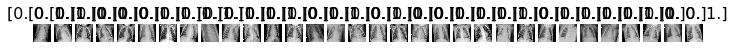

In [ ]:
plots(imgs, titles=labels)

In [ ]:
model = Sequential()
model.add(Conv2D(64, (5, 5), input_shape=(256, 256,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((3, 3)))

model.add(Conv2D(128, (4, 4))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (2, 2))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 

model.add(Dense(512, kernel_regularizer=regularizers.l2(0.02))) 
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(3)) 
model.add(Activation('softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 252, 252, 64)      4864      
_________________________________________________________________
activation_1 (Activation)    (None, 252, 252, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 84, 84, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 81, 81, 128)       131200    
_________________________________________________________________
activation_2 (Activation)    (None, 81, 81, 128)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 40, 40, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 38, 38, 512)      

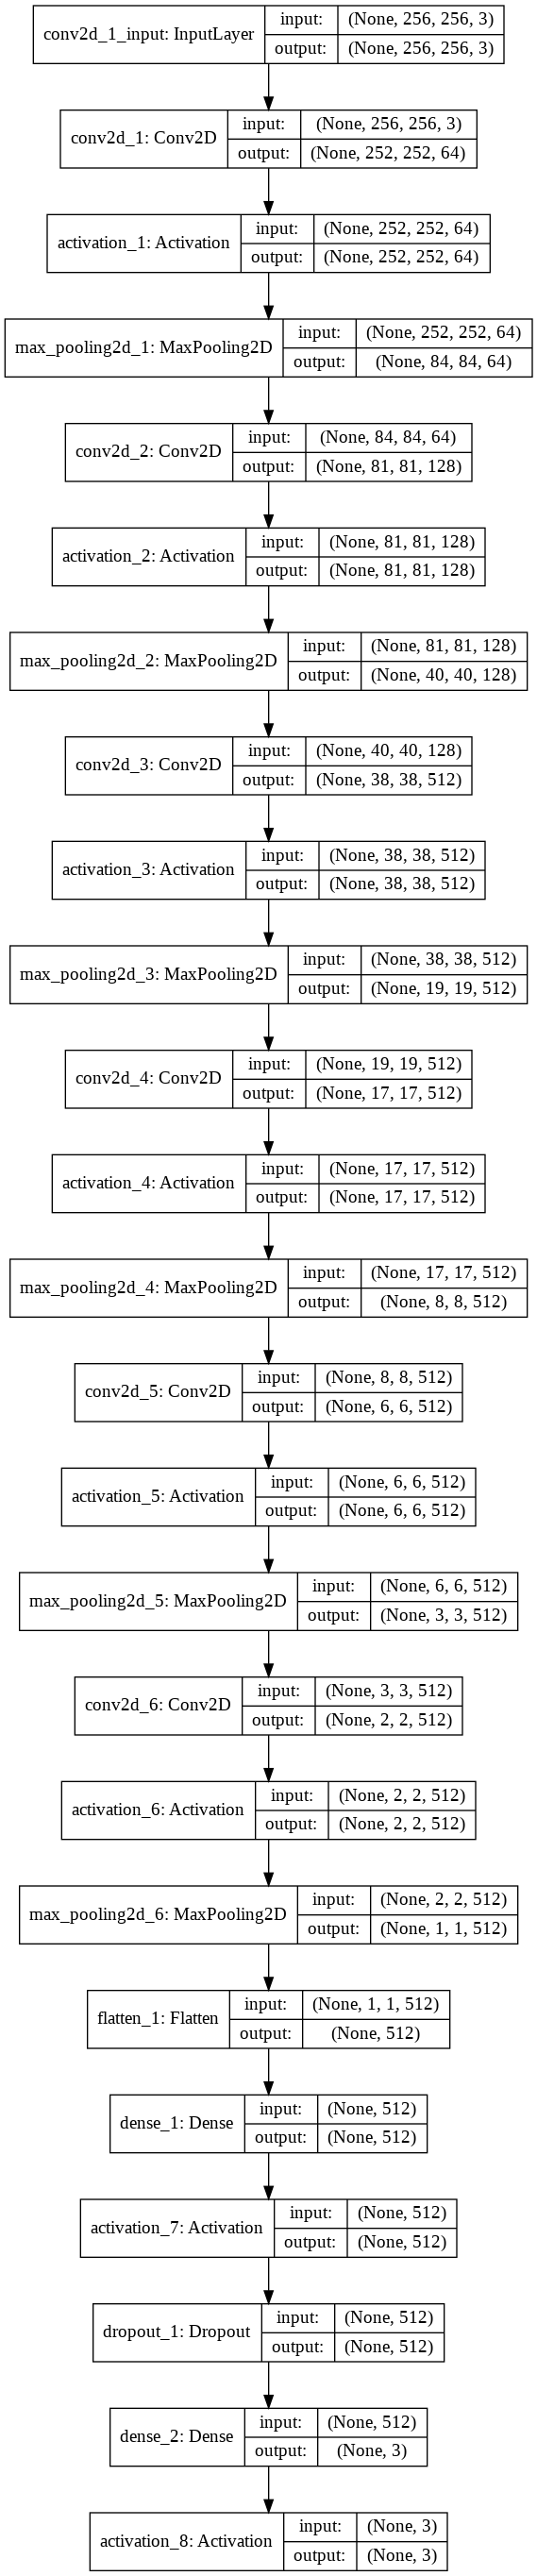

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
regularizer = tf.keras.regularizers.l2(0.01)

for layer in model.layers:
    for attr in ['kernel_regularizer']:
        if hasattr(layer, attr):
          setattr(layer, attr, regularizer)

In [ ]:
model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_batches, 
                    validation_data=valid_batches, epochs=20, verbose=2)


Epoch 1/20
 - 4051s - loss: 6.0192 - accuracy: 0.6751 - val_loss: 2.5296 - val_accuracy: 0.8117
Epoch 2/20
 - 261s - loss: 2.3061 - accuracy: 0.8162 - val_loss: 1.5620 - val_accuracy: 0.8660
Epoch 3/20
 - 260s - loss: 1.4900 - accuracy: 0.8883 - val_loss: 1.2278 - val_accuracy: 0.9154
Epoch 4/20
 - 262s - loss: 1.0907 - accuracy: 0.9151 - val_loss: 0.7868 - val_accuracy: 0.8834
Epoch 5/20
 - 261s - loss: 0.8682 - accuracy: 0.9159 - val_loss: 0.6185 - val_accuracy: 0.9428
Epoch 6/20
 - 259s - loss: 0.6899 - accuracy: 0.9283 - val_loss: 0.9413 - val_accuracy: 0.9311
Epoch 7/20
 - 264s - loss: 0.5361 - accuracy: 0.9483 - val_loss: 0.3405 - val_accuracy: 0.9580
Epoch 8/20
 - 268s - loss: 0.4631 - accuracy: 0.9443 - val_loss: 0.8231 - val_accuracy: 0.9456
Epoch 9/20
 - 268s - loss: 0.3918 - accuracy: 0.9462 - val_loss: 0.2074 - val_accuracy: 0.9669
Epoch 10/20
 - 259s - loss: 0.3482 - accuracy: 0.9457 - val_loss: 0.1837 - val_accuracy: 0.9652
Epoch 11/20
 - 259s - loss: 0.2738 - accuracy: 

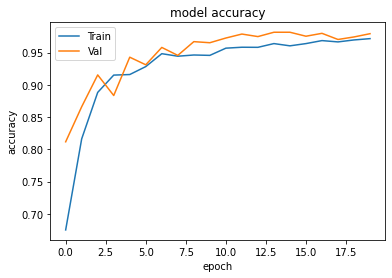

In [ ]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

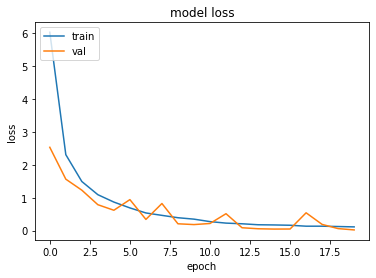

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save('/content/gdrive/My Drive/Colab Notebooks/2ndownmodel.h5')

In [ ]:
# Save the Model to JSON
model_json = model.to_json()
with open('/content/gdrive/My Drive/Colab Notebooks/2ndownmodel.json', 'w') as json_file:
    json_file.write(model_json)
    
print('Model saved to the disk.')

Model saved to the disk.


In [ ]:

# ------------------------------------------------------------------------
# Load saved model and its weights
'''
>> Model weights are saved to HDF5 format.
>> The model structure can be described and saved using two different formats: JSON and YAML.
'''

# Import dependencies
from keras.optimizers import Adam
from tensorflow.keras.models import model_from_json
from tensorflow.python.framework import ops
ops.reset_default_graph()
import h5py 
from PIL import Image
import PIL
# from vb100_utils import *

In [ ]:
# Get the architecture of CNN
json_file = open('/content/gdrive/My Drive/Colab Notebooks/2ndownmodel.json')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# Get weights into the model
loaded_model.load_weights('/content/gdrive/My Drive/Colab Notebooks/2ndownmodel.h5')
loaded_model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 252, 252, 64)      4864      
_________________________________________________________________
activation_1 (Activation)    (None, 252, 252, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 84, 84, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 81, 81, 128)       131200    
_________________________________________________________________
activation_2 (Activation)    (None, 81, 81, 128)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 40, 40, 128)       0         
_______________________________________

In [ ]:
# Define optimizer and run
opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
loaded_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='rmsprop')



'''
Important Note! For this block optimizer is entered manualy as Tensorflow object.
For future, need to change it for include it as variable with full set of
parameters as Tensorflow variable.

'''

IMG = Image.open('/content/gdrive/My Drive/Colab Notebooks/Covid-19 Kaggle-Copy-499-dataset/Covid-19 Kaggle - Copy/Covid-19 Kaggle/COVID Test/Covid/0102.jpeg')
print(type(IMG))
x = image.img_to_array(IMG)
print(x.shape)


IMG = IMG.resize((256, 256))
IMG = np.array(IMG)
print('po array = {}'.format(IMG.shape))
IMG = np.true_divide(IMG,3)
IMG = IMG.reshape(1, 256, 256, 3)
print(type(IMG), IMG.shape)

predictions = loaded_model.predict(IMG)

print(loaded_model)
predictions_c = loaded_model.predict_classes(IMG)



<class 'PIL.JpegImagePlugin.JpegImageFile'>
(1333, 1118, 3)
po array = (256, 256, 3)
<class 'numpy.ndarray'> (1, 256, 256, 3)


In [ ]:
classes = {'TRAIN': ['Covid','Normal','Pneumonia'],
           'VALIDATION': ['Covid','Normal','Pneumonia'],
           'TEST': ['Covid','Normal','Pneumonia']}

predicted_class = classes['TRAIN'][predictions_c[0]]
print('We think that is {}.'.format(predicted_class.lower()))
print(predictions * 100)

We think that is covid.
[[96.01744    0.5959513  3.3866007]]
